In [1]:
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input ,Dense ,Dropout ,LayerNormalization ,Softmax ,LeakyReLU
from keras import Model
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

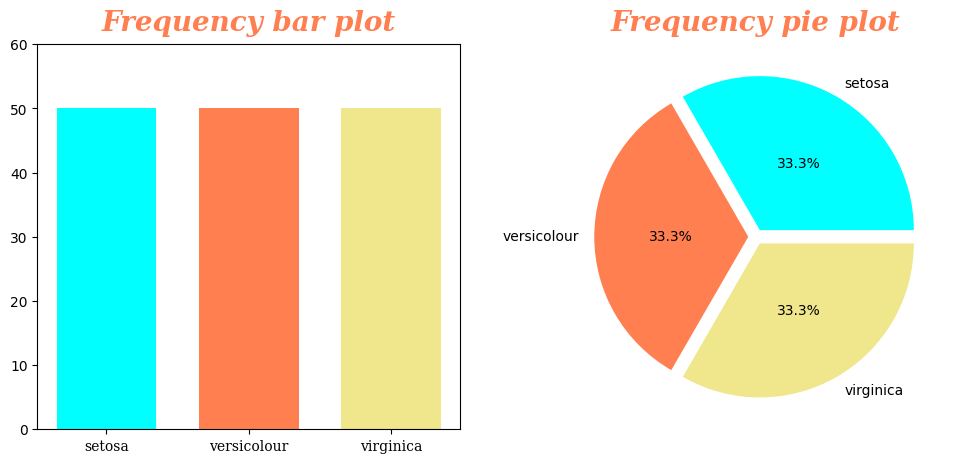

In [2]:
# preprocessing
data =load_iris(return_X_y =True) 
x_norm =(data[0] /np.max(data[0] ,axis =0)).astype(np.float32)
label =data[1].reshape(-1,1).astype(np.int32)
xtr ,xte ,ytr ,yte =train_test_split(x_norm ,label ,test_size =0.2)
label_series =pd.Series(label[:,0] ,name ='label')
label_count =[]
label_class =[]
for i in range(3) : 
    label_count.append(label_series.value_counts()[i])
    label_class.append(i) 
plt.figure(num =1 ,dpi =100 ,figsize =(12,5))
def font_config(family ,color ,weight ,style ,size) : 
    font ={'family': family,
            'color':  color,
            'weight': weight,
            'fontstyle' : style ,
            'size': size
        }
    return font
font_ticks =font_config('serif' ,'black' ,'normal' ,'normal' ,10)
font_title =font_config('serif' ,'coral' ,'bold' ,'italic' ,20)
colors =['aqua' ,'coral' ,'khaki']
labels =['setosa' ,'versicolour' ,'virginica']
plt.subplot(121)
plt.bar(label_class ,label_count ,width =0.7 ,color =colors)
plt.xticks(ticks =label_class ,labels =labels ,fontdict =font_ticks) 
plt.ylim((0 ,label_count[0] +10))
plt.title(label ='Frequency bar plot' ,pad =10 ,fontdict =font_title)
plt.subplot(122)
plt.pie(label_count ,
        colors =colors ,
        labels =labels ,
        explode =[0.05 ,0.05 ,0.05] ,
        startangle =0 ,
        autopct ='%1.1f%%' ,
        pctdistance =0.5 ,
        labeldistance =1.1 ,
        textprops ={'size' : 10})
plt.title(label ='Frequency pie plot' ,pad =10 ,fontdict =font_title)
plt.show()

In [25]:
# model definition
def create_model(): 
    input =Input(shape =(4,))
    dense1 =Dense(units =1024)(input)
    norm1 =LayerNormalization()(dense1) 
    act1 =LeakyReLU(negative_slope =0.2)(norm1) 
    drop1 =Dropout(rate =0.5)(act1) 
    dense2 =Dense(units =524)(drop1)
    norm2 =LayerNormalization()(dense2) 
    act2 =LeakyReLU(negative_slope =0.2)(norm2) 
    drop2 =Dropout(rate =0.5)(act2)
    dense3 =Dense(units =256)(drop2)
    norm3 =LayerNormalization()(dense3) 
    act3 =LeakyReLU(negative_slope =0.2)(norm3) 
    drop3 =Dropout(rate =0.5)(act3)
    dense4 =Dense(units =128)(drop3)
    norm4 =LayerNormalization()(dense4) 
    act4 =LeakyReLU(negative_slope =0.2)(norm4) 
    drop4 =Dropout(rate =0.5)(act4)
    dense5 =Dense(units =64)(drop4)
    norm5 =LayerNormalization()(dense5) 
    act5 =LeakyReLU(negative_slope =0.2)(norm5) 
    drop5 =Dropout(rate =0.4)(act5)
    dense6 =Dense(units =32)(drop5)
    norm6 =LayerNormalization()(dense6) 
    act6 =LeakyReLU(negative_slope =0.2)(norm6) 
    drop6 =Dropout(rate =0.4)(act6)
    dense7 =Dense(units =16)(drop6)
    norm7 =LayerNormalization()(dense7) 
    act7 =LeakyReLU(negative_slope =0.2)(norm7) 
    drop7 =Dropout(rate =0.4)(act7)
    dense8 =Dense(units =3)(drop7)
    norm8 =LayerNormalization()(dense8) 
    act8 =Softmax()(norm8) 
    model =Model(inputs =input ,outputs =act8)
    model.compile(optimizer =Adam(learning_rate =0.001) ,loss =SparseCategoricalCrossentropy)
    return model
model =create_model() 
model.summary() 

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1024)           │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_48          │ (None, 1024)           │         2,048 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_42 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 524)            │       537,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_49          │ (None, 524)            │         1,048 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_43 (LeakyReLU)      │ (None, 524)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 524)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │       134,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_50          │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_51          │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_52          │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 724,525 (2.76 MB)

 Trainable params: 724,525 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
# train model 
epoch =200
batch_size =32
fpath ='checkpoint.weights.h5'
c_point =keras.callbacks.ModelCheckpoint(filepath =fpath ,monitor ='val_loss' ,mode ='min' ,save_weights_only =True ,save_best_only =True)
early_stoping =keras.callbacks.EarlyStopping(monitor ='val_loss' ,patience =60 ,restore_best_weights =True)
train =model.fit(xtr ,ytr ,epochs =epoch ,batch_size =batch_size ,validation_data =(xte ,yte) ,callbacks =[early_stoping ,c_point] ,verbose =2)

In [27]:
# model evalulation
Y =model.predict(xte) 
Yte =[]
for predict in Y : 
  lbl =np.where(predict ==np.max(predict))[0][0]
  Yte.append(lbl)
Yte =np.asarray(Yte).reshape(-1,1)
test_acc_per =accuracy_score(y_true =yte ,y_pred =Yte) *100
print(f'accuracy_score_for_test_data : {test_acc_per} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
accuracy_score_for_test_data : 96.66666666666667 %


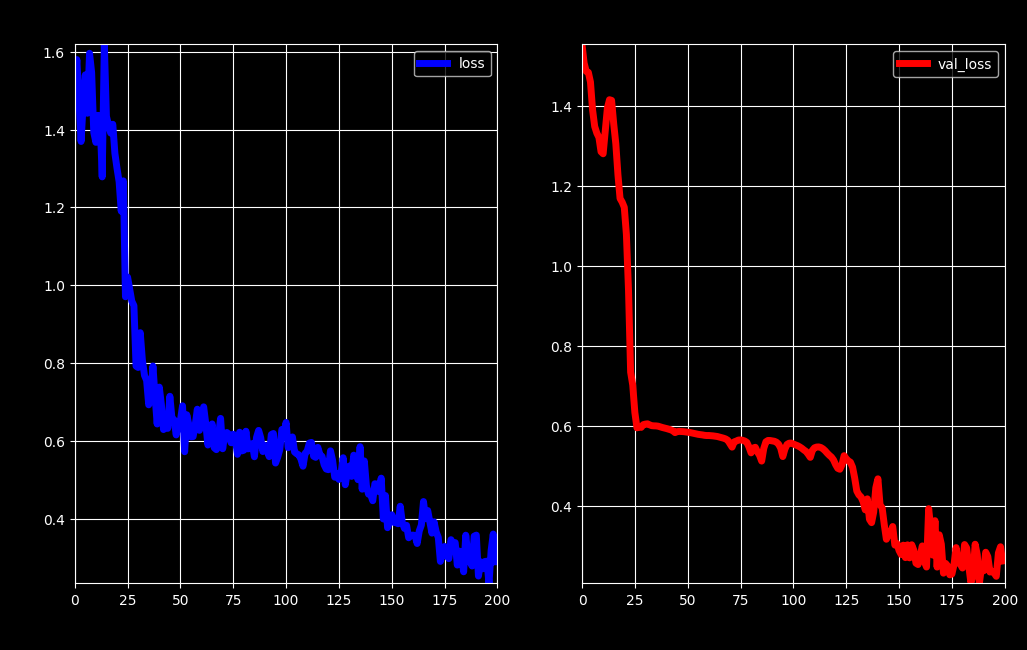

In [28]:
# val/loss plot
plt.style.use('dark_background')
plt.figure(num =1 ,figsize =(12,7) ,dpi =100)
font_title =font_config('serif' ,'black' ,'normal' ,'italic' ,20)
font_label =font_config('serif' ,'black' ,'normal' ,'italic' ,15)
plt.subplot(121)
plt.plot(train.history['loss'] ,color ='blue' ,lw =5  ,label ='loss')
plt.xlim((0 ,epoch))
plt.ylim((np.min(train.history['loss']) ,np.max(train.history['loss'])))
plt.xlabel(xlabel ='epochs' ,labelpad =10 ,loc ='right' ,fontdict =font_label)
plt.ylabel(ylabel ='loss' ,labelpad =10 ,loc ='top' ,fontdict =font_label)
plt.title(label ='loss plot' ,pad =10 ,fontdict =font_title)
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(train.history['val_loss'] ,color ='red' ,lw =5  ,label ='val_loss')
plt.xlim((0 ,epoch))
plt.ylim((np.min(train.history['val_loss']) ,np.max(train.history['val_loss'])))
plt.xlabel(xlabel ='epochs' ,labelpad =10 ,loc ='right' ,fontdict =font_label)
plt.ylabel(ylabel ='val_loss' ,labelpad =10 ,loc ='top' ,fontdict =font_label)
plt.title(label ='val_loss plot' ,pad =10 ,fontdict =font_title)
plt.grid()
plt.legend()
plt.show()